Mental health of individuals is very underrated. People without right guidance end up commiting suicides. Different countries have specific number of health facilities and happiness report.

This project aim at analysing the following datasets and gain several insights from them.

**I have considered 4 datasets:**
1) Facilities dataset for mental health patients - CSV FORMAT
2) Suicide rate dataset - XLSX FORMAT
3) Happiness report dataset from 2019 - JSON FORMAT
4) Happiness dataset from 2018 - JSON FORMAT

Different exploration, data manipulation and visualization techniques were applied such as data aggregation, plotting etc.

IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot 

IMPORTING THE DATA 1- HOSPITAL FACILITIES FOR MENTAL HEALTH

In [ ]:
#importing the data - taken from kaggle
facilities_data = pd.read_csv("Facilities.csv")

DATA EXPLORATION

In [ ]:
#Shape of the dataset
facilities_data.shape

(112, 7)

In [ ]:
#First few rows of dataset
facilities_data.head()

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [ ]:
#Statistics of dataset
facilities_data.describe()

,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
count,112.0,90.000000,102.000000,100.000000,51.000000,45.000000
mean,2016.0,0.246133,0.319078,1.875130,1.134804,0.873311
std,0.0,0.910416,0.618220,3.227911,2.725713,1.609117
min,2016.0,0.000000,0.006000,0.006000,0.002000,0.006000
25%,2016.0,0.018250,0.035750,0.123500,0.022500,0.033000
50%,2016.0,0.036500,0.093500,0.573000,0.125000,0.152000
75%,2016.0,0.158750,0.379000,2.236000,0.760500,0.479000
max,2016.0,8.314000,4.542000,19.751000,17.176000,6.178000


In [ ]:
facilities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 112 non-null    object 
 1   Year                    112 non-null    int64  
 2   Mental _hospitals       90 non-null     float64
 3   health_units            102 non-null    float64
 4   outpatient _facilities  100 non-null    float64
 5   day _treatment          51 non-null     float64
 6   residential_facilities  45 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
#checking if the dataset has any null values
result = facilities_data.isnull().sum()

In [ ]:
print(result)

Country                    0
Year                       0
Mental _hospitals         22
health_units              10
outpatient _facilities    12
day _treatment            61
residential_facilities    67
dtype: int64


There are null values in columns. Replacing them with median values 

replacing with median values

In [ ]:
facilities_data["Mental _hospitals"].fillna(facilities_data["Mental _hospitals"].median(), inplace = True)
facilities_data["health_units"].fillna(facilities_data["health_units"].median(), inplace = True)
facilities_data["outpatient _facilities"].fillna(facilities_data["outpatient _facilities"].median(), inplace = True)
facilities_data["day _treatment"].fillna(facilities_data["day _treatment"].median(), inplace = True)
facilities_data["residential_facilities"].fillna(facilities_data["residential_facilities"].median(), inplace = True)

checking if all null values are replaced

In [ ]:

facilities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 112 non-null    object 
 1   Year                    112 non-null    int64  
 2   Mental _hospitals       112 non-null    float64
 3   health_units            112 non-null    float64
 4   outpatient _facilities  112 non-null    float64
 5   day _treatment          112 non-null    float64
 6   residential_facilities  112 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


Generating correlation matrix for the data

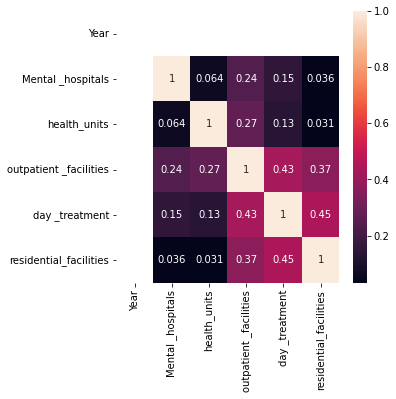

In [ ]:
plot.figure(figsize=(5,5))
corr_= facilities_data.corr()
sns.heatmap(corr_,annot=True)

IMPORTING DATASET 2 - MENTAL HEALTH SUICIDE RATES 

In [ ]:
suicide_rates_data = pd.read_excel('suicide rates.xlsx')

Exploring the suicide dataset

In [ ]:
suicide_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [ ]:
suicide_rates_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [ ]:
suicide_rates_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [ ]:
suicide_rates_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

EXPLORING SUICIDE RATES PER COUNTRY OF MALE AND FEMALE

In [ ]:
countries = suicide_rates_data['country'].unique()
countries_subset = countries[3:7]

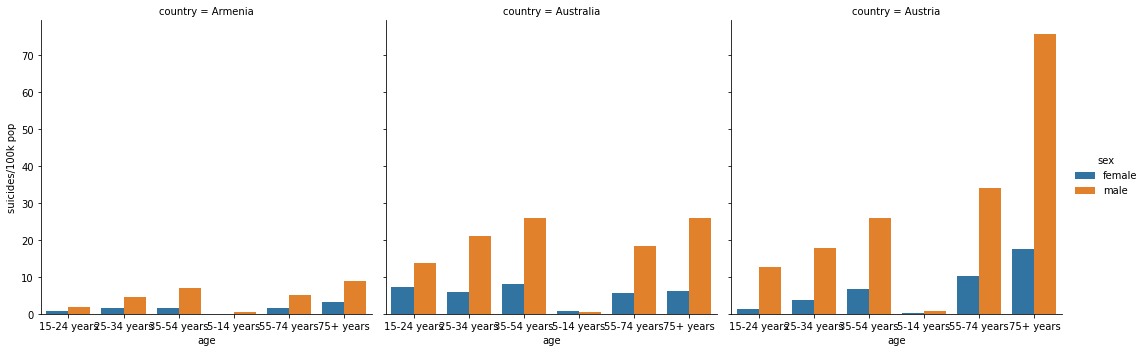

In [ ]:

graphs= (suicide_rates_data.loc[(suicide_rates_data['country'].isin(countries_subset)) & (suicide_rates_data['year'] == 2012), ['country','sex','age','suicides/100k pop']] .sort_values(['sex','age']))


sns.catplot(x='age', hue='sex', col='country', y='suicides/100k pop', data=graphs, kind='bar')

In [ ]:
countries_subset = countries[8:10]

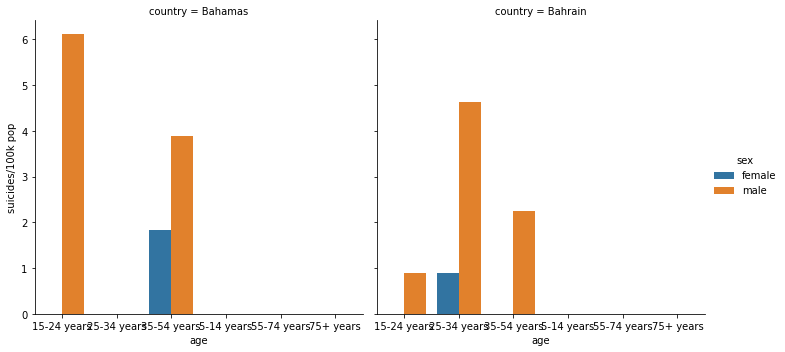

In [ ]:

graphs= (suicide_rates_data.loc[(suicide_rates_data['country'].isin(countries_subset)) & (suicide_rates_data['year'] == 2012), ['country','sex','age','suicides/100k pop']] .sort_values(['sex','age']))


sns.catplot(x='age', hue='sex', col='country', y='suicides/100k pop', data=graphs, kind='bar')

Plotting year, age group and change in suicide rates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


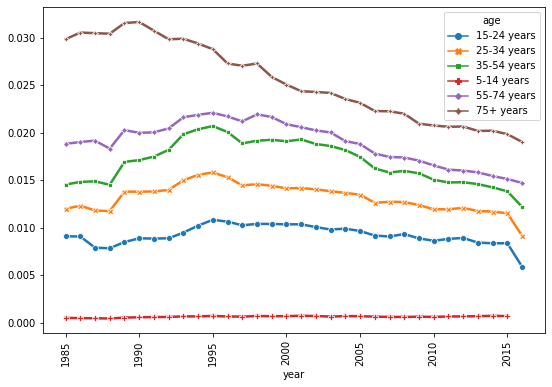

In [ ]:
df_age = suicide_rates_data.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plot.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plot.xticks(rotation = 90)
plot.show()

aggregate the suicide_no and population based on year and age. The population describes what percent of population are prone to suicide

In [ ]:
from os import supports_bytes_environ
df_age['population'] = df_age["suicides_no"] / df_age['population']
df_age

suicides_no  population
year age                                 
1985 15-24 years        17870    0.000091
     25-34 years        20771    0.000120
     35-54 years        35748    0.000145
     5-14 years           984    0.000005
     55-74 years        28736    0.000188
...                       ...         ...
2016 15-24 years         1195    0.000059
     25-34 years         2070    0.000091
     35-54 years         5766    0.000122
     55-74 years         4715    0.000147
     75+ years           1857    0.000190

[191 rows x 2 columns]

aggregating the data by country and total suicide rates

In [192]:
pd.crosstab(suicide_rates_data['country'], suicide_rates_data['suicides_no'].sum())

col_0,6748420
country,
Albania,264
Antigua and Barbuda,324
Argentina,372
Armenia,298
Aruba,168
...,...
United Arab Emirates,72
United Kingdom,372
United States,372


Aggregating the datasets by year and average suicide rate for that year

In [ ]:
suicide_rates_data.groupby('year').agg({'suicides_no': 'mean'})

,suicides_no
year,
1985,201.498264
1986,209.496528
1987,195.743827
1988,205.826531
1989,256.801282
1990,251.772135
1991,257.838542
1992,271.119231
1993,284.057692


IMPORTING DATASET 3 - HAPPINESS REPORT

In [ ]:
import pandas as pd

happiness_report_2019 = pd.read_json('2019.json')
happiness_report_2018 = pd.read_json('2018.json')



Exploring the 2018 and 2019 happiness dataset

In [ ]:
happiness_report_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happiness_report_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Merging the two datasets 

In [ ]:
files_=['2019.json','2018.json']

df1 = pd.read_json('2019.json')
df2 = pd.read_json('2018.json')
from functools import reduce
merged_happiness_report = reduce(lambda x,y: pd.merge(x,y, on=["Overall rank", "Country or region"], how='left'), [df1,df2])


In [ ]:
merged_happiness_report

,Overall rank,Country or region,Score_x,GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,Generosity_x,Perceptions of corruption_x,Score_y,GDP per capita_y,Social support_y,Healthy life expectancy_y,Freedom to make life choices_y,Generosity_y,Perceptions of corruption_y
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.083,0.024,0.000,0.010,0.305,0.218,0.038


checking null values

In [ ]:
print(merged_happiness_report.isnull().sum())

Overall rank                        0
Country or region                   0
Score_x                             0
GDP per capita_x                    0
Social support_x                    0
Healthy life expectancy_x           0
Freedom to make life choices_x      0
Generosity_x                        0
Perceptions of corruption_x         0
Score_y                           141
GDP per capita_y                  141
Social support_y                  141
Healthy life expectancy_y         141
Freedom to make life choices_y    141
Generosity_y                      141
Perceptions of corruption_y       141
dtype: int64


Filling the null values

In [ ]:
merged_happiness_report["Score_y"].fillna(merged_happiness_report["Score_y"].median(), inplace = True)
merged_happiness_report["GDP per capita_y"].fillna(merged_happiness_report["GDP per capita_y"].median(), inplace = True)
merged_happiness_report["Social support_y"].fillna(merged_happiness_report["Social support_y"].median(), inplace = True)
merged_happiness_report["Healthy life expectancy_y"].fillna(merged_happiness_report["Healthy life expectancy_y"].median(), inplace = True)
merged_happiness_report["Freedom to make life choices_y"].fillna(merged_happiness_report["Freedom to make life choices_y"].median(), inplace = True)
merged_happiness_report["Generosity_y"].fillna(merged_happiness_report["Generosity_y"].median(), inplace = True)
merged_happiness_report["Perceptions of corruption_y"].fillna(merged_happiness_report["Perceptions of corruption_y"].median(), inplace = True)

In [ ]:
print(merged_happiness_report.isnull().sum())

Overall rank                      0
Country or region                 0
Score_x                           0
GDP per capita_x                  0
Social support_x                  0
Healthy life expectancy_x         0
Freedom to make life choices_x    0
Generosity_x                      0
Perceptions of corruption_x       0
Score_y                           0
GDP per capita_y                  0
Social support_y                  0
Healthy life expectancy_y         0
Freedom to make life choices_y    0
Generosity_y                      0
Perceptions of corruption_y       0
dtype: int64


Aggregating the dataset by similar columns and droping the unnecessary columns

In [ ]:
sum_score = merged_happiness_report["Score_x"] + merged_happiness_report["Score_y"]
merged_happiness_report["Score_x"] = sum_score
merged_happiness_report.drop('Score_y', axis=1, inplace=True) 

sum_GDP = merged_happiness_report["GDP per capita_x"] + merged_happiness_report["GDP per capita_y"]
merged_happiness_report["GDP per capita_x"] = sum_GDP
merged_happiness_report.drop('GDP per capita_y', axis=1, inplace=True) 

sum_ss = merged_happiness_report["Social support_x"] + merged_happiness_report["Social support_y"]
merged_happiness_report["Social support_x"] = sum_ss
merged_happiness_report.drop('Social support_y', axis=1, inplace=True) 

sum_G = merged_happiness_report["Generosity_x"] + merged_happiness_report["Generosity_y"]
merged_happiness_report["Generosity_x"] = sum_G
merged_happiness_report.drop('Generosity_y', axis=1, inplace=True) 

merged_happiness_report.drop('Healthy life expectancy_x', axis=1, inplace=True)
merged_happiness_report.drop('Healthy life expectancy_y', axis=1, inplace=True)

merged_happiness_report.drop('Freedom to make life choices_x', axis=1, inplace=True)
merged_happiness_report.drop('Freedom to make life choices_y', axis=1, inplace=True)

merged_happiness_report.drop('Perceptions of corruption_x', axis=1, inplace=True)
merged_happiness_report.drop('Perceptions of corruption_y', axis=1, inplace=True)



In [ ]:
print(merged_happiness_report.isnull().sum())

Overall rank         0
Country or region    0
Score_x              0
GDP per capita_x     0
Social support_x     0
Generosity_x         0
dtype: int64


In [ ]:
merged_happiness_report.rename(columns={"Overall rank": "Rank", "Country or region": "Country", "Score_x":"Score","GDP per capita_x":"GDP","Social support_x":"Social Support" , "Generosity_x":"Generosity"})

,Rank,Country,Score,GDP,Social Support,Generosity
0,1,Finland,15.401,2.645,3.179,0.355
1,2,Denmark,13.390,2.526,3.024,0.458
2,3,Norway,13.344,2.631,3.033,0.477
3,4,Iceland,14.989,2.723,3.268,0.707
4,5,Netherlands,13.278,2.539,2.973,0.528
...,...,...,...,...,...,...
151,152,Rwanda,9.124,1.502,2.162,0.423
152,153,Tanzania,6.534,0.931,1.876,0.546
153,154,Afghanistan,8.993,1.493,1.968,0.364
154,155,Central African Republic,6.166,0.050,0.000,0.453


Plotting the happiness score against population

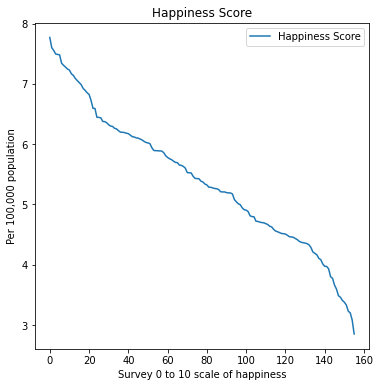

In [ ]:
p= merged_happiness_report['Score_x']
def plot_(p):
    plot.figure(figsize=(6,6))
    plot.plot(p,label='Happiness Score')
    
    #To show labels
    plot.legend()
    plot.xlabel('Survey 0 to 10 scale of happiness')
    plot.ylabel('Per 100,000 population')
    
    # Title
    plot.title('Happiness Score')
    

plot_(p)

**CONCLUSION**

From the data exploration and visualization the following are observed:

There is a correlation between residential facilities and day treatment.
Comparatively there are more suicides of male than female.

Older people tend to commit more suicides, followed by teenagers. It is consistent through the years.

The suicide rates are on the same scale for most of the countries.

Highest number of incidences happend in 2015 when comparing from 1985 to 2017.

The happiness score among whole population is consistenty decreasing.

There are not adequate facilities for mental health guidance.

Northern european countries such as denmark, finland, netherlands etc have best happiness score compared to others.

In [ ]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add week15_assignment.ipynb
    !git commit -a -m "Submitting the week 15 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')